In [59]:
import pandas as pd

In [84]:
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [60]:
data=pd.read_csv('movie_data.csv')
len(data)

50000

In [61]:
data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


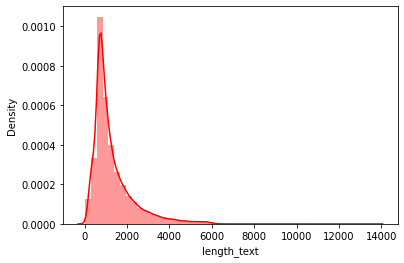

In [63]:
data['length_text'] = data['review'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

In [64]:
docs = [x for x in data['review']]

In [65]:
import nltk

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [68]:
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [69]:
# A function to prepare the text for topic modelling
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-69-08cae9460540>:6: DeprecationWarning: invalid escape sequence \S
  words = [re.sub('\S*@\S*\s?', '', sent) for se

In [70]:
import re

In [71]:
nltk.download('wordnet')
#docs = [words(x) for x in data['text']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
docs = [words(x) for x in data['review']]

In [ ]:
#https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF/blob/master/Topic%20Modeling.ipynb

In [73]:
from gensim.corpora import Dictionary

In [74]:
 # Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20%(no_above=0.2) of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 92284
Number of unique words after removing rare and common words: 22846


In [75]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))

Word 65 ("old") appears 1 time.
Word 137 ("line") appears 1 time.
Word 177 ("american") appears 1 time.
Word 185 ("better") appears 1 time.
Word 189 ("chance") appears 1 time.
Word 226 ("new") appears 1 time.
Word 249 ("stuff") appears 1 time.
Word 304 ("making") appears 1 time.
Word 334 ("may") appears 1 time.
Word 394 ("hepburn") appears 1 time.
Word 410 ("might") appears 1 time.
Word 414 ("need") appears 1 time.
Word 589 ("hill") appears 1 time.
Word 811 ("die") appears 1 time.
Word 845 ("almost") appears 1 time.
Word 873 ("hard") appears 1 time.
Word 919 ("famous") appears 1 time.
Word 1058 ("level") appears 1 time.
Word 1128 ("early") appears 1 time.
Word 1165 ("slip") appears 1 time.
Word 1167 ("something") appears 1 time.
Word 1231 ("appreciate") appears 1 time.
Word 1401 ("horrible") appears 1 time.
Word 1647 ("generation") appears 1 time.
Word 1674 ("moment") appears 1 time.
Word 1781 ("pretty") appears 3 time.
Word 1895 ("corny") appears 1 time.
Word 2007 ("amusing") appears 

LDA :: Latent Dirichlet Allocation is a probabilistic model. It is a unsupervised machine learning technique. And to obtain cluster assignments, it uses two probability values: P( word | topics) and P( topics | documents).

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

The size of the bubble measures the importance of the topics, relative to the data. When we have 5 or 10 topics, we can see certain topics are clustered together (overlapping bubbles), this indicates the similarity between topics.

In [76]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [77]:
import gensim.corpora
from gensim.models import ldamodel


In [86]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [87]:
get_lda_topics(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,woman,work,show,world,look,horror,war,role,head,best
1,girl,director,series,art,ever,blood,man,john,guy,performance
2,love,seems,episode,american,better,violence,hero,play,game,music
3,young,may,tv,cinema,lot,flick,human,played,run,love
4,old,however,u,black,something,gore,evil,man,car,book
5,kid,quite,world,white,watching,sex,earth,robert,kill,version
6,family,audience,american,picture,funny,zombie,space,michael,dead,role
7,year,rather,documentary,action,actually,scary,doctor,star,take,play
8,friend,two,season,early,nothing,vampire,death,james,around,cast
9,child,without,television,style,going,creepy,soldier,cast,killed,comedy


In [ ]:
#https://stackoverflow.com/questions/66759852/no-module-named-pyldavis

In [ ]:
#!pip install pyLDAvis

In [88]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vs3.3.0 had to rename the file name, so now use import pyLDAvis.gensim_models

Note: the colab examples have import pyLDAvis.gensim AS gensimvis, and I could rename the file to gensimvis.py then it would simply be import pyLDAvis.gensimvis

In [91]:
#get_lda_topics(lda_model, 10)

In [90]:
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.187832 -0.027810       1        1  28.299334
1     -0.181306 -0.050738       2        1  15.990458
0     -0.002054 -0.087939       3        1  10.208327
9     -0.164508  0.239138       4        1   9.106900
3     -0.081924 -0.001750       5        1   7.091747
8      0.179390 -0.114067       6        1   7.033251
6      0.182736 -0.165227       7        1   6.826382
7      0.089061  0.271448       8        1   6.450390
2     -0.107877 -0.178888       9        1   5.493126
5      0.274315  0.115834      10        1   3.500084, topic_info=        Term          Freq         Total Category  logprob  loglift
77      show  17436.000000  17436.000000  Default  30.0000  30.0000
598     best  12960.000000  12960.000000  Default  29.0000  29.0000
928   horror   7541.000000   7541.000000  Default  28.0000  28.0000
138     love  13111.000000  13111.000000  Default  27.0000  27.0000
628   series   6483.000000   6483.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1125   death    853.934101   4359.430772  Topic10  -5.2715   1.7221
105   budget    821.138840   3847.589793  Topic10  -5.3107   1.8079
603      fan    857.167961   6696.607994  Topic10  -5.2677   1.2967
139      low    740.329038   3570.660361  Topic10  -5.4143   1.7790
64     night    741.975119   4670.887962  Topic10  -5.4121   1.5126

[589 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1442      2  0.998114  ability
1442      6  0.000928  ability
540       1  0.539046   action
540       5  0.303205   action
540       6  0.124106   action
...     ...       ...      ...
269       9  0.088776     york
270       3  0.966138    young
270       8  0.033684    young
3660      3  0.999334  younger
1106     10  0.999596   zombie

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 10, 4, 9, 7, 8, 3, 6])

In [94]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [95]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.017*"woman" + 0.015*"girl" + 0.014*"love" + 0.014*"young" + 0.014*"old" + 0.013*"kid"')
(1, '0.011*"work" + 0.010*"director" + 0.008*"seems" + 0.008*"may" + 0.008*"however" + 0.007*"quite"')
(2, '0.067*"show" + 0.025*"series" + 0.018*"episode" + 0.014*"tv" + 0.011*"u" + 0.009*"world"')
(3, '0.009*"world" + 0.009*"art" + 0.009*"american" + 0.009*"cinema" + 0.008*"black" + 0.008*"white"')
(4, '0.009*"look" + 0.008*"ever" + 0.008*"better" + 0.007*"lot" + 0.007*"something" + 0.007*"watching"')
(5, '0.045*"horror" + 0.015*"blood" + 0.012*"violence" + 0.012*"flick" + 0.012*"gore" + 0.011*"sex"')
(6, '0.015*"war" + 0.009*"man" + 0.008*"hero" + 0.007*"human" + 0.006*"evil" + 0.005*"earth"')
(7, '0.013*"role" + 0.013*"john" + 0.011*"play" + 0.008*"played" + 0.008*"man" + 0.008*"robert"')
(8, '0.011*"head" + 0.011*"guy" + 0.010*"game" + 0.010*"run" + 0.009*"car" + 0.008*"kill"')
(9, '0.026*"best" + 0.018*"performance" + 0.015*"music" + 0.014*"love" + 0.013*"book" + 0.010*"version"')


In [96]:
#Performance evaluation by classifying sample document using LDA Bag of Words model
for index, score in sorted(lda_model[corpus[300]], key=lambda tup: -1*tup[1]) :
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 40)))

ValueError: ignored

In [98]:
from itertools import chain

In [99]:
words_list=list(chain.from_iterable(docs))

In [117]:
sent = [x for x in data['review']]

In [120]:
# Cosine similarity
def cosine_sim(text1, text2):
    tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
    return ((tfidf_score * tfidf_score.T).A)[0, 1]

# Most similar article
def closest_doc_name(sentence, docs):
    cos = []
    for i in range(len(docs)):
        cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
    return [sent[x] for x in np.argsort(cos)[-10:][::-1]]
    #print(cos)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=words, stop_words=stop_words).fit(words_list)

In [103]:
import numpy as np

In [121]:
closest_doc_name('horror', docs)

["As far as horror flicks go, this one is pretty darn good. While it may not be a classic tale of horror and suspense, it does provide many quality chuckles that make this movie a must see if you're into the horror/comedy genre.",
 "The film 'Nightbreed' is one of the best horror films I have ever seen. Overall, I'm not a big fan of horror films, but there is something about this film that is more atmospheric and different from any other horror film I have ever seen. Many horror films i've seen i've enjoyed watching, however, as they are based on horror, I know that the stories are unreal, as they are fictional, therefore I can't take them all seriously. Nightbeed, on the other hand, is a unique horror Genre as it has a feel of realism that i've seen in very few other horror films.<br /><br />This films story on how a man gets murdered and ends up living with the undead in an underground cemetery shelter with undead monsters is the kind of story a person would get from a dreaming Night

In [134]:
'''
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])'''

In [131]:
'''from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,dictionary=None, texts =corpus, coherence='c_v')
'''(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)
coherence_lda = coherence_model_lda.get_coherence()'''
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)'''


Coherence Score:  nan


In [ ]:
#************************https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0*******#
#****https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF/blob/master/Topic%20Modeling.ipynb****#